In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
w = [1,0,0,0,0,0,0,0,0]
a = [0,1,0,0,0,0,0,0,0]
s = [0,0,1,0,0,0,0,0,0]
d = [0,0,0,1,0,0,0,0,0]
wa =[0,0,0,0,1,0,0,0,0]
wd =[0,0,0,0,0,1,0,0,0]
sa =[0,0,0,0,0,0,1,0,0]
sd =[0,0,0,0,0,0,0,1,0]
nk =[0,0,0,0,0,0,0,0,1]

In [3]:
numpy_data = np.load('training_data_without_balancing.npy',allow_pickle=True)
df = pd.DataFrame(data=numpy_data, columns=["Images", "Keys"])

In [4]:
for i in range(len(df)):
    if df["Keys"][i] == nk:
        df["Keys"][i] = "nk"
    elif df["Keys"][i] == w:
        df["Keys"][i] = "w"
    elif df["Keys"][i] == a:
        df["Keys"][i] = "a"
    elif df["Keys"][i] == s:
        df["Keys"][i] = "s"
    elif df["Keys"][i] == d:
        df["Keys"][i] = "d"
    elif df["Keys"][i] == wa:
        df["Keys"][i] = "wa"
    elif df["Keys"][i] == wd:
        df["Keys"][i] = "wd"
        

DataSet summary : 
                                              Images Keys
0  [[[235, 202, 173], [235, 202, 172], [235, 202,...   nk
1  [[[235, 202, 173], [235, 202, 172], [235, 202,...   nk
2  [[[235, 202, 173], [235, 202, 172], [235, 202,...   nk
3  [[[235, 202, 173], [235, 202, 172], [235, 202,...   nk
4  [[[235, 202, 173], [235, 202, 172], [235, 202,...   nk

Total Data :  23000

Key Distribution : 
w     17608
nk     2628
s       853
wd      839
wa      668
a       219
d       185
Name: Keys, dtype: int64


Text(0, 0.5, 'Frequency')

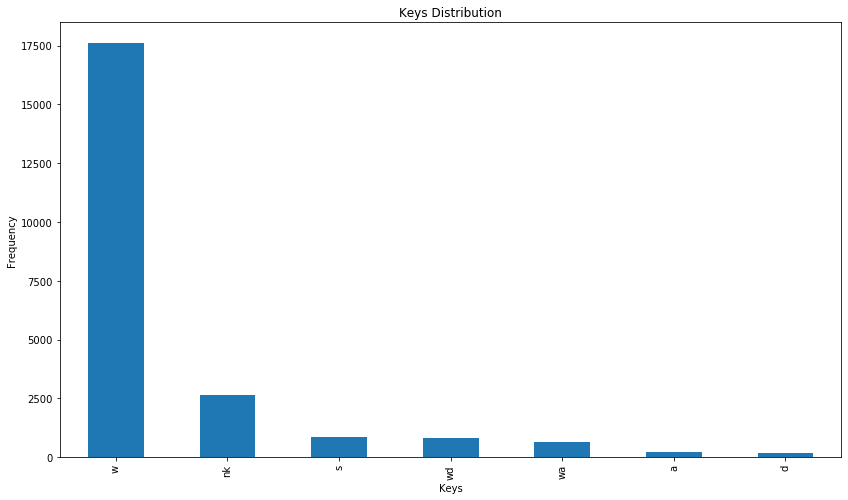

In [5]:
print("DataSet summary : ")
print(df.head())
print()
print("Total Data : ",len(df))
print()
print("Key Distribution : ")
print(df["Keys"].value_counts())
ax = df['Keys'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Keys Distribution")
ax.set_xlabel("Keys")
ax.set_ylabel("Frequency")

Key Distribution : 
forward    17608
stop        3481
right       1024
left         887
Name: Keys, dtype: int64


Text(0, 0.5, 'Frequency')

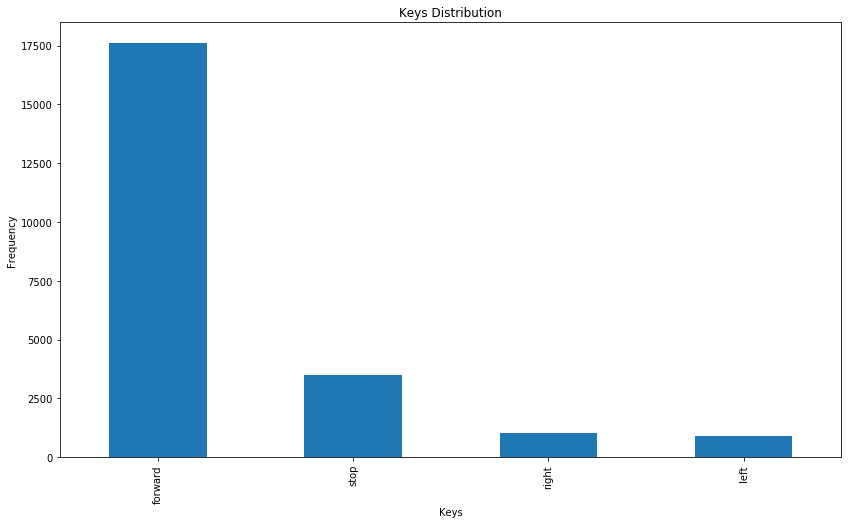

In [6]:
#Merge WA+A , WD+D and S+NK as they are similar
for i in range(len(df)):
    if df["Keys"][i] == "nk":
        df["Keys"][i] = "stop"
    elif df["Keys"][i] == "w":
        df["Keys"][i] = "forward"
    elif df["Keys"][i] == 'a':
        df["Keys"][i] = "left"
    elif df["Keys"][i] == 's':
        df["Keys"][i] = "stop"
    elif df["Keys"][i] == 'd':
        df["Keys"][i] = "right"
    elif df["Keys"][i] == 'wa':
        df["Keys"][i] = "left"
    elif df["Keys"][i] == 'wd':
        df["Keys"][i] = "right"
    
print("Key Distribution : ")
print(df["Keys"].value_counts())
ax = df['Keys'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Keys Distribution")
ax.set_xlabel("Keys")
ax.set_ylabel("Frequency")